<a href="https://colab.research.google.com/github/yashvardhan751/ML_Projects/blob/main/Loan_Status.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loan Status Prediction Using ML.**

**Work-Flow**

Data----->Data preprocessing------>Train-Test split------->Support Vector Learning Model(Supervised learning)------>Trained SVM model(It predicts whether loan is approved or not)

**1.Importing the Dependencies**

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler

**2. Data Collections and Processing**

In [2]:
#Loading the dataset to pandas
loan_dataset=pd.read_csv('/content/archive (1).zip')

In [3]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [4]:
#Printing the 1st  5 rows of the dataset
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
#number of rows and coloumn
loan_dataset.shape

(614, 13)

In [6]:
#Statistical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
#Number of missing value in each coloumn
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
#Dropping the missing values
loan_dataset=loan_dataset.dropna()

In [9]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
#Label Encoding
loan_dataset.replace({"Loan_status":{'N':0,'Y':1}},inplace=True)


In [11]:
#Dependent Coloumn Values
loan_dataset['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [12]:
#Replacing the value of 3+ to 4
loan_dataset=loan_dataset.replace(to_replace='3+',value=4)


In [13]:
#Dependent Values
loan_dataset['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

**3.Data Visualisation**

<Axes: xlabel='Education', ylabel='count'>

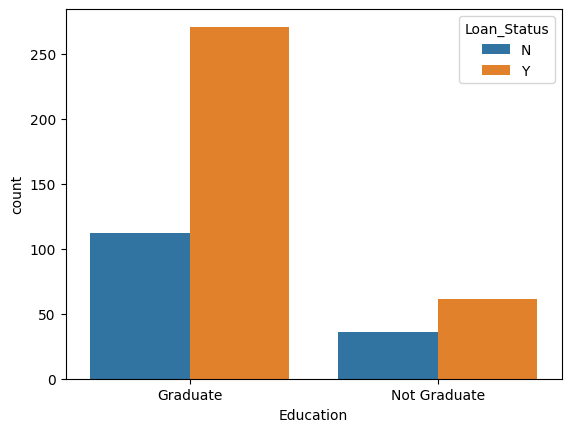

In [14]:
#education && loan Status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

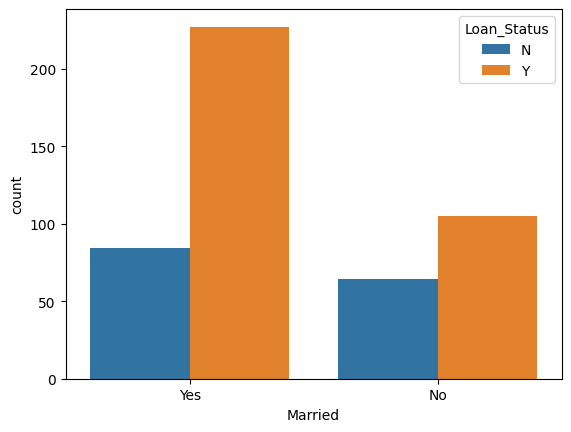

In [16]:
# plotting for marital status
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

In [19]:
#Converting categorical coloumn to numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0},'Loan_Status':{'N':0,'Y':1}},inplace=True)

In [20]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [21]:
#Separating the data and label(loan status)
x=loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y=loan_dataset['Loan_Status']

In [22]:
print(y)

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64


In [23]:
print(x)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

**4.Train_Test Split**

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,stratify=y,random_state=2)

In [26]:
print(x.shape,x_train.shape,x_test.shape)

(480, 11) (432, 11) (48, 11)


In [29]:
#Training the model using SVM
classifier=svm.SVC(kernel='linear')

In [30]:
#Training the SVM model
classifier.fit(x_train,y_train)


SVC(kernel='linear')

In [34]:
#Model Evaluation
#Finding accuracy on training data
x_train_prediction=classifier.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)

In [35]:
print('Accuracy on training data:',training_data_accuracy)

Accuracy on training data: 0.7986111111111112


In [38]:
x_test_prediction=classifier.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)

In [40]:
print('Accuracy on test data:',test_data_accuracy)

Accuracy on test data: 0.8333333333333334


Making a predictive system

In [52]:
#Making a predictive model

#input_data=(1,1,1,1,0,3000,0.0,66.0,360.0,1.0,2)
input_data=(1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2	)
input_data_as_numpy_array=np.asarray(input_data)
#reshaping the array as we are predicting for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

#Standardise the input data
scaler=StandardScaler()
scaler.fit(input_data_reshaped)
std_data=scaler.transform(input_data_reshaped)
#print(std_data)

prediction=classifier.predict(std_data)
print(prediction)






[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
